# Analysing Exchange Rates of AUD and EUR during the covid-19 Pandamic 

The project's goal is analysing and visualizing exchange rates of EUR (Euro) and AUD (The Australian dollar). The daily exchange rates were collected between years 1999 and 2022. You can find the original dataset on Kaggle under the name [Daily Exchange Rates per Euro 1999-2022](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020?select=euro-daily-hist_1999_2022.csv).

### 1- Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 2- Introduction to the data

In [25]:
# Importing the dataset
ER = pd.read_csv("euro-daily-hist_1999_2022.csv")

# Checking first elements of the dataset
ER.head(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,...,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999
1,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,...,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
2,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,...,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932


In [26]:
# Checking last elements of the dataset
ER.tail(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5955,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5956,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5957,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [27]:
# Getting some information about dataset 
ER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5958 non-null   object 
 1   [Australian dollar ]      5958 non-null   object 
 2   [Bulgarian lev ]          5556 non-null   object 
 3   [Brazilian real ]         5690 non-null   object 
 4   [Canadian dollar ]        5958 non-null   object 
 5   [Swiss franc ]            5958 non-null   object 
 6   [Chinese yuan renminbi ]  5690 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5958 non-null   object 
 9   [Danish krone ]           5958 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5958 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5958 non-null   object 
 14  [Croatia

## 3. Data Cleaning

### 3-1 Cleaning the header 

In [28]:
# Creating a function for cleaning header row
def c_columns(x):
    x = x.replace("[", "")
    x = x.replace(" ]", "")
    x = x.strip()
    x = x.replace(" ", "_")
    x = x.lower()
    return x

In [29]:
# Changing the cleaned header to the original header
new_header = []

for i in ER.columns:
    clean_header = c_columns(i)
    new_header.append(clean_header)

ER.columns = new_header

In [30]:
# Renaming the "period\unit" column to time
ER.rename(columns={"period\\unit:":"time"}, inplace= True)

In [31]:
# Converting "time" column to Datetime format 
ER["time"] = pd.to_datetime(ER["time"])
ER.sort_values("time", inplace=True)

In [32]:
# Resetting the index of dataset
ER.reset_index(drop=True, inplace=True)
ER.head()

,time,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


### 3-2 Cleaning the data values

The aim of this project is to analyze **EUR** (Euro)  and **AUD** (The Australian dollar) rates. I will proceed with cleaning the particular currency column and the time column.

In [33]:
# Extracting AUD column
E_A = ER[["time", "australian_dollar"]]

# Counting the occurences of each variable in the column
E_A["australian_dollar"].value_counts(dropna=False)

-         62
1.6242     8
1.5781     8
1.6194     7
1.5840     7
          ..
1.9587     1
1.9679     1
1.9624     1
1.9840     1
1.5600     1
Name: australian_dollar, Length: 3535, dtype: int64

There are 62 occurences with "-" symbol. Since it makes only **1%** of the whole set, I will drop those rows.

In [34]:
# Droping the rows with "-" symbol
E_A = E_A[E_A["australian_dollar"] != "-"]

In [35]:
# Converting the column to float
E_A["australian_dollar"] = E_A["australian_dollar"].astype(float)
E_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               5896 non-null   datetime64[ns]
 1   australian_dollar  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


Now the cleaned data is ready for visualization.
 - The dataset has 5896 rows and two columns.
 - There is no NaN values.

## 4. Exploratory visualizations

### 4.1 Analysing EUR-AUD Exchange Rates from 1999-2022

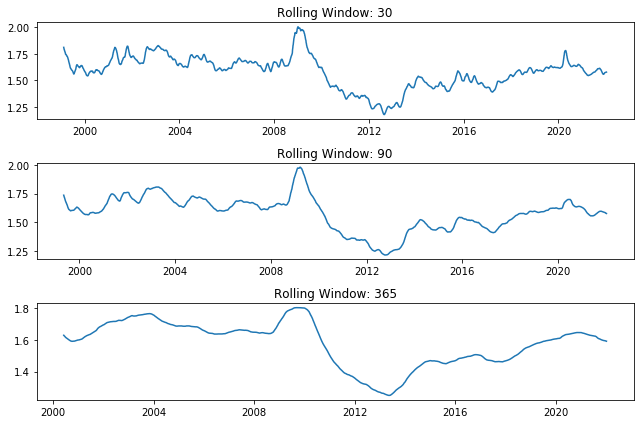

In [36]:
# Visualizing the EUR-AUD Exchange rates within a window of 30, 90, and 365 
plt.figure(figsize=(9,6))

for i, j in zip([1,2,3],[30,90,365]):
    plt.subplot(3,1,i)
    plt.plot(E_A["time"],E_A["australian_dollar"].rolling(j).mean())
    plt.title("Rolling Window:" + " " + str(j))
    
plt.tight_layout()    
plt.show()

### 4.2. Analyzing EUR-AUD exchange rates during the covid-19 pandemic

In [37]:
# Creating a new column which takes the average of AUD within a window of 30
E_A["rolling_mean"] = E_A["australian_dollar"].rolling(30).mean()
E_A.iloc[:32,:]

,time,australian_dollar,rolling_mean
0,1999-01-04,1.9100,NaN
1,1999-01-05,1.8944,NaN
2,1999-01-06,1.8820,NaN
3,1999-01-07,1.8474,NaN
4,1999-01-08,1.8406,NaN
5,1999-01-11,1.8134,NaN
6,1999-01-12,1.8090,NaN
7,1999-01-13,1.8620,NaN
8,1999-01-14,1.8353,NaN
9,1999-01-15,1.8388,NaN


In [38]:
# Filtering time period from December 2019
E_A_covid = E_A.copy()[E_A["time"] >= "2019-12-01"]

In [39]:
E_A_covid

,time,australian_dollar,rolling_mean
5417,2019-12-02,1.6240,1.619433
5418,2019-12-03,1.6186,1.619263
5419,2019-12-04,1.6203,1.619100
5420,2019-12-05,1.6251,1.619027
5421,2019-12-06,1.6190,1.618760
...,...,...,...
5953,2022-01-04,1.5682,1.576627
5954,2022-01-05,1.5600,1.576797
5955,2022-01-06,1.5778,1.577300
5956,2022-01-07,1.5804,1.577330


In [40]:
# Filtering time period between January and April 2020
E_A_covid_first_cases = E_A[(E_A["time"].between('2020-01-25', '2020-04-25'))].copy()

In [41]:
#Finding max value in the filttered time period
E_A_covid[E_A_covid['rolling_mean']==E_A_covid['rolling_mean'].max()]

,time,australian_dollar,rolling_mean
5513,2020-04-21,1.7266,1.780663


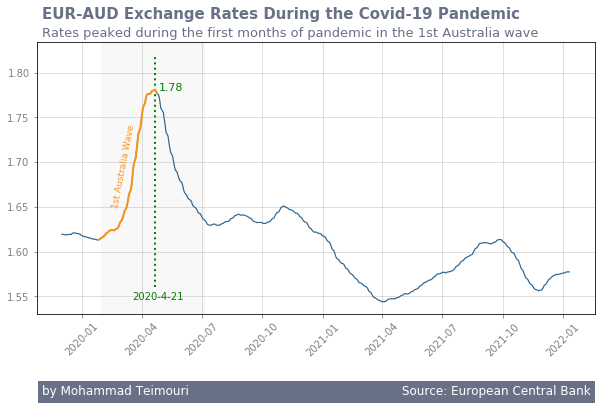

In [49]:
# Adding the plot
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(E_A_covid["time"],
        E_A_covid["rolling_mean"],
        linewidth=1.2, color="#2F658E")
ax.grid(alpha=0.5)
ax.tick_params(axis="x", rotation=45, colors="gray", labelsize=10)
ax.tick_params(axis="y", colors="gray", labelsize=10)

# Highlihting Australia 1st wave
ax.axvspan(xmin=dt.date(2020, 1, 30), xmax=dt.date(2020, 7, 5), ymin=0, alpha=0.3, color='#e8e9eb')

# Highlighting the first months of the pandemic
ax.plot(E_A_covid_first_cases["time"],
        E_A_covid_first_cases["rolling_mean"],
        linewidth=2, color="#F7941D")

# Explaining texts
ax.text(dt.date(2020, 2, 15), 1.65, "1st Australia Wave",rotation=79, color="#F7941D", size=9)

# Highlighting the Max value
plt.vlines(x=dt.date(2020, 4, 21), ymin=1.56, ymax=1.82, colors='green', ls=':', lw=2, label='vline_single - full height')
ax.text(dt.date(2020, 3, 17), 1.546, "2020-4-21", color="green", size=10)
ax.text(dt.date(2020, 4, 27), 1.78, "1.78", color="green", size=11)

# Title & subtitle
ax.text(dt.date(2019, 11, 1), 1.86, "EUR-AUD Exchange Rates During the Covid-19 Pandemic", weight="bold", color="#697187", size=15)
ax.text(dt.date(2019, 11, 1), 1.84, "Rates peaked during the first months of pandemic in the 1st Australia wave ", color="#697187", size=13)


# Source
ax.text(dt.date(2019, 11, 1), 1.44, "by Mohammad Teimouri" + " "*55 + "Source: European Central Bank",
         color="white", size=12, backgroundcolor = '#697187')

plt.show()